In [14]:
import numpy as np

from tensorflow import keras
from keras import saving as sv

import scripts.utilities as utl

import models.inception_autoencoder
import models.advanced_autoencoder as adv_cae

In [17]:
BATCH_SIZE = 3
IMG_SIZE = 128
MODEL_50_PATH = 'trained-models/dsm-50/adv_model_50.weights.h5'
MODEL_100_PATH = 'trained-models/dsm-100/adv_model_100.weights.h5'
MODEL_SAVE_PATH = 'trained-models/'
IMG_PATH = 'data/test-images/correct'
ANO_IMG_PATH = 'data/test-images/incorrect'
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
RANDOM_SEED = 42

In [5]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    brightness_range=[0.5, 1]
)

ano_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    IMG_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='input',  
    subset='training',
    seed=RANDOM_SEED  
)

ano_generator = ano_datagen.flow_from_directory(
    ANO_IMG_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='input',  
    subset='training',
    seed=RANDOM_SEED
)

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


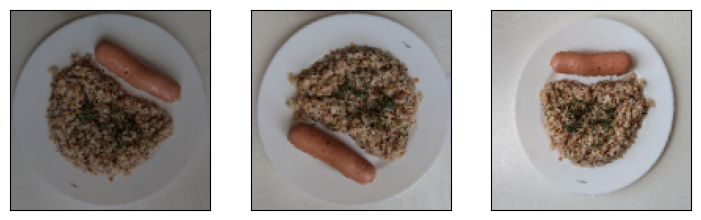

In [7]:
utl.plot_imgs(train_generator)

In [15]:
model_50 = adv_cae.Autoencoder(shape=IMG_SHAPE)
model_100 = adv_cae.Autoencoder(shape=IMG_SHAPE)

c:\Users\Nikit\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [18]:
model_50.load_weights(MODEL_50_PATH, skip_mismatch=True)
model_100.load_weights(MODEL_100_PATH, skip_mismatch=True)

In [ ]:
# model_50 = sv.load_model(MODEL_50_PATH)
# model_100 = sv.load_model(MODEL_100_PATH)

In [19]:
model_50.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0000004),
    loss='mean_squared_error',
)
model_100.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0000004),
    loss='mean_squared_error',
)

In [20]:
epochs=10
history = model_50.fit(
    x=train_generator,
    epochs=epochs,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

Epoch 1/10


c:\Users\Nikit\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0039
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 0.0034
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 0.0040
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 0.0033
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 0.0034
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 0.0044
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 0.0045
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.0038
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.0055
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 0.0034


In [21]:
epochs=10
history = model_100.fit(
    x=train_generator,
    epochs=epochs,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0035
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 0.0031
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 0.0048
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 0.0032
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 0.0034
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 0.0041
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 0.0039
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 0.0030
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 0.0038
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 0.0035


In [24]:
grechka_recon_error_list = utl.get_error(train_generator, model_50, BATCH_SIZE)
ano_grechka_recon_error_list = utl.get_error(ano_generator, model_50, BATCH_SIZE)

clean = grechka_recon_error_list
fraud = ano_grechka_recon_error_list
threshold = np.mean(clean) + np.std(clean)

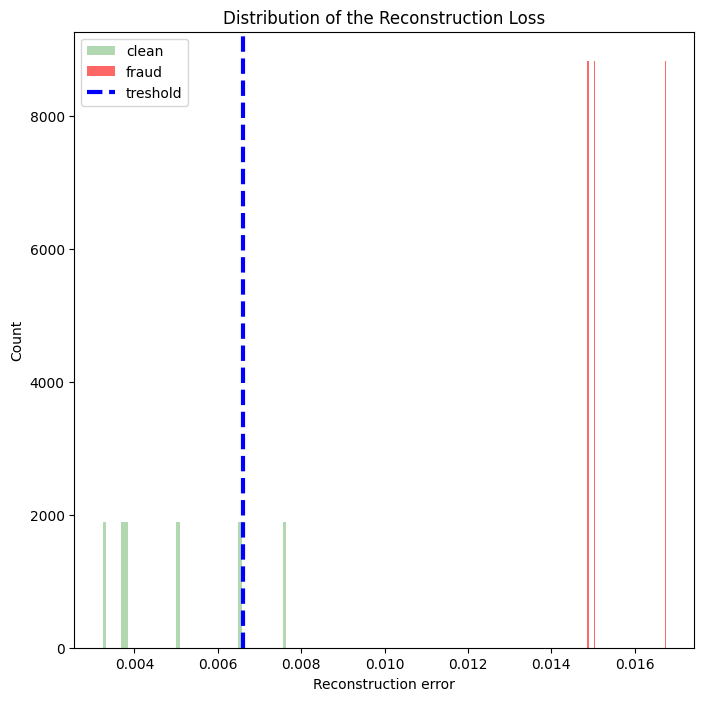

In [25]:
utl.plot_rec_distribution(clean, fraud, threshold)

In [29]:
model_50.save_weights(MODEL_SAVE_PATH+'adv_model_50_with_test.weights.h5')
model_100.save_weights(MODEL_SAVE_PATH+'adv_model_100_with_test.weights.h5')